In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 📂 Load the cleaned dataset
df = pd.read_csv("vgsales_cleaned.csv")  # Replace with your correct path if needed

# 🎯 Define target variable (Global_Sales) and input features (everything else)
X = df.drop('Global_Sales', axis=1)  # All columns except the target
y = df['Global_Sales']               # Target column (to be predicted)

# ✂️ Split data into training and testing sets (80% train, 20% test)
# random_state ensures reproducibility — same split every time you run this
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [6]:
# Import regression evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 🔮 Predict the target variable (Global_Sales) using the test set
y_pred = xgb_model.predict(X_test)

# 📉 Calculate Mean Absolute Error (average of absolute differences)
mae = mean_absolute_error(y_test, y_pred)

# 📉 Calculate Root Mean Squared Error (square root of average squared differences)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 📈 Calculate R² Score (explained variance; closer to 1 means better fit)
r2 = r2_score(y_test, y_pred)

# 🖨️ Print the results with 4 decimal places
print(f"MAE:  {mae:.4f}")   # Lower is better
print(f"RMSE: {rmse:.4f}")  # Lower is better
print(f"R²:   {r2:.4f}")    # Higher is better (max = 1.0

MAE:  0.0476
RMSE: 0.8614
R²:   0.8240


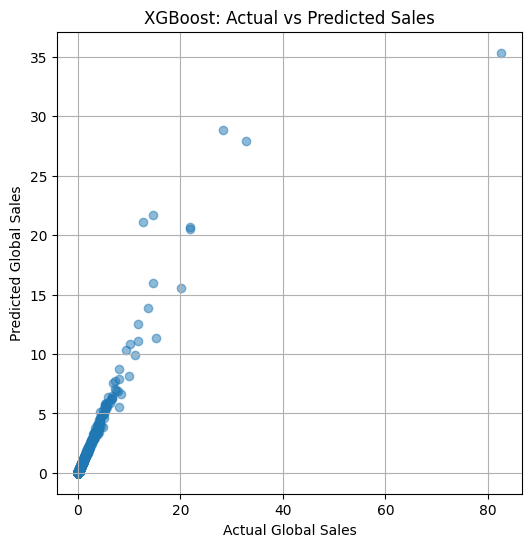

In [7]:
#Visualize predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("XGBoost: Actual vs Predicted Sales")
plt.grid(True)
plt.show()


In [8]:
#Save the trained model

import joblib

joblib.dump(xgb_model, "xgb_best_model.pkl")
print("✅ XGBoost model saved successfully.")


✅ XGBoost model saved successfully.
